<a href="https://colab.research.google.com/github/luarias2405/TFM/blob/main/VersionYoloV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementacion YoloV5

Importación de Liberias

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage import morphology
from scipy.ndimage.morphology import binary_fill_holes as bfh
from google.colab import drive
from skimage.measure import regionprops
from skimage.measure import label
from skimage.morphology import convex_hull_image
import os 
from PIL import Image
import glob
import random

Conexión con Google Drive

In [ ]:
drive.mount('/content/gdrive')

In [ ]:
%cd /content/gdrive/MyDrive/TFM1.1

Clonamos el gihub de yolov5 y instalamos requerimientos junto con torch

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

In [ ]:
%cd /content/gdrive/MyDrive/TFM1.1/yolov5

In [ ]:
%pip install -qr requirements.txt  # install
import torch
import utils
display = utils.notebook_init()  # checks

Entrenamiento

In [ ]:
!python train.py --img 640 --batch 16 --epochs 150 --data custom_data.yaml --weights yolov5m.pt --cache

Validación

In [6]:
!python val.py --weights runs/train/exp5/weights/best.pt --data custom_data.yaml --img 640

val: data=/content/gdrive/MyDrive/TFM1.1/yolov5/data/custom_data.yaml, weights=['runs/train/exp5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-132-ga82132c Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /content/gdrive/MyDrive/TFM1.1/dataset/val/labels.cache... 226 images, 0 backgrounds, 0 corrupt: 100% 226/226 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 8/8 [00:12<00:00,  1.52s/it]
                   all        226        304      0.969      0.865      0.899      0.797
Speed: 0.4ms pre-process, 15.4ms inference, 5.0ms NMS per image at

Predición

In [132]:
!python detect.py --weights runs/train/exp5/weights/best.pt --img 640 --conf 0.25 --source /content/gdrive/MyDrive/TFM1.1/dataset/test/images

detect: weights=['runs/train/exp5/weights/best.pt'], source=/content/gdrive/MyDrive/TFM1.1/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-132-ga82132c Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/113 /content/gdrive/MyDrive/TFM1.1/dataset/test/images/A00_02_1_5.jpg: 640x640 2 Mitosiss, 13.3ms
image 2/113 /content/gdrive/MyDrive/TFM1.1/dataset/test/images/A00_04_4_2.jpg: 640x640 1 Mitosis, 15.0ms
image 3/113 /content/gdrive/MyDrive/TFM1.1/dataset/test/images/A00_09_1_1.jpg: 640x640 1 

Implementamos código, para la validación de la predicción con nuestras coordenadas almacenadas en el archivo .txt correspondiente a cada imagen

0 0.393 0.497 0.141 0.119



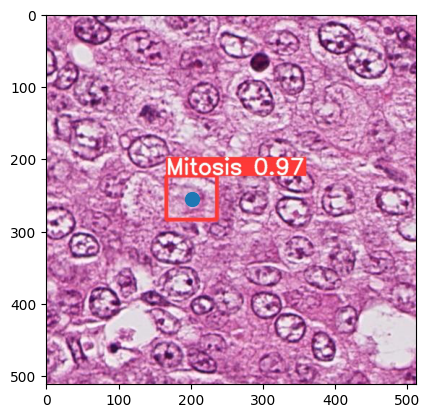

In [128]:
%matplotlib inline
with open('/content/gdrive/MyDrive/TFM1.1/dataset/test/labels/H04_08_6_3.txt') as f:
  for line in f:
    print(line)
    #firstline = line.readlines()
    data = line.split()
    #print(data)
    x=round(float(data[1])*512,2)
    y=round(float(data[2])*512,2)
    #print(x,y)
    img= io.imread("/content/gdrive/MyDrive/TFM1.1/yolov5/runs/detect/exp/H04_08_6_3.jpg")
    #print(img[:,:,1])
    plt.plot(x,y,marker="o",markersize=10)
    plt.imshow(img)